In [4]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162997 sha256=575e1e3e989e9e77447adf3c9e420f85a8593f1b1500f22145c91ab63ac2c70c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [5]:
import surprise
from surprise import Dataset
from surprise.model_selection import cross_validate
import pandas as pd

# Завантаження даних MovieLens
data = Dataset.load_builtin('ml-100k')

# Список алгоритмів для крос-валідації
algorithms = {
    'NormalPredictor': surprise.NormalPredictor(),
    'BaselineOnly': surprise.BaselineOnly(),
    'KNNBasic': surprise.KNNBasic(),
    'KNNWithMeans': surprise.KNNWithMeans(),
    'KNNWithZScore': surprise.KNNWithZScore(),
    'KNNBaseline': surprise.KNNBaseline(),
    'SVD': surprise.SVD(),
    'SVDpp': surprise.SVDpp(),
    'NMF': surprise.NMF(),
    'SlopeOne': surprise.SlopeOne(),
    'CoClustering': surprise.CoClustering()
}

# Збереження результатів крос-валідації для кожного алгоритму
results = {}

# Виконання крос-валідації для кожного алгоритму
for algorithm_name, algorithm in algorithms.items():
    cv_results = cross_validate(algorithm, data, measures=['rmse', 'mae'], cv=5, verbose=False)
    results[algorithm_name] = {
        'RMSE': cv_results['test_rmse'],
        'MAE': cv_results['test_mae'],
        'Fit Time': cv_results['fit_time'],
        'Test Time': cv_results['test_time']
    }

# Конвертація результатів у формат DataFrame для зручності
results_df = pd.DataFrame.from_dict(results, orient='index')
print("Результати крос-валідації для різних алгоритмів:")
print(results_df)


Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similari



---


 *   **RMSE: Менше значення RMSE вказує на кращу точність передбачень.**
 *   **MAE: Подібно до RMSE, менше значення MAE означає кращу точність.**

---



In [7]:
# Установка бібліотек для візуалізації
!pip install matplotlib seaborn

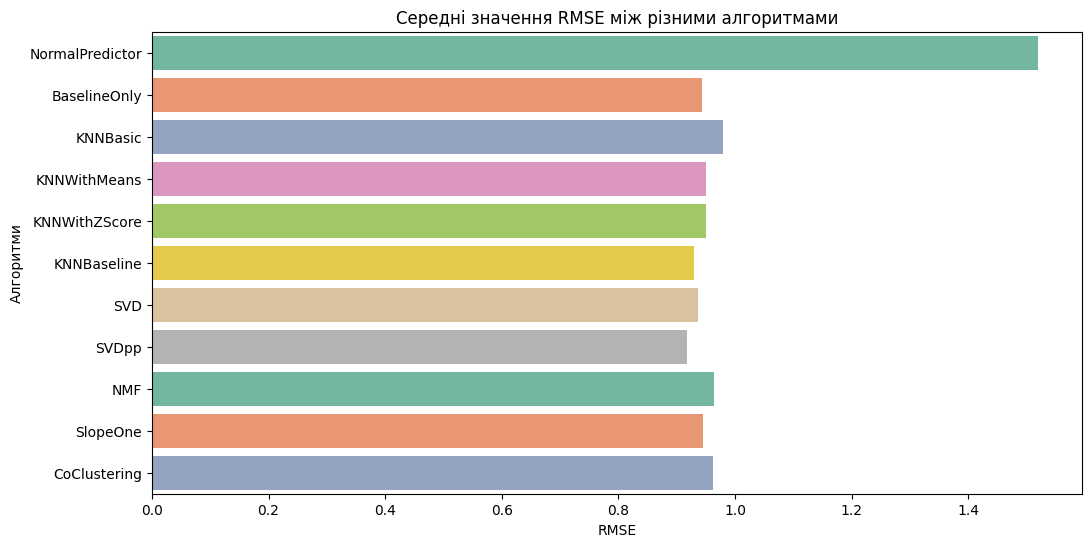

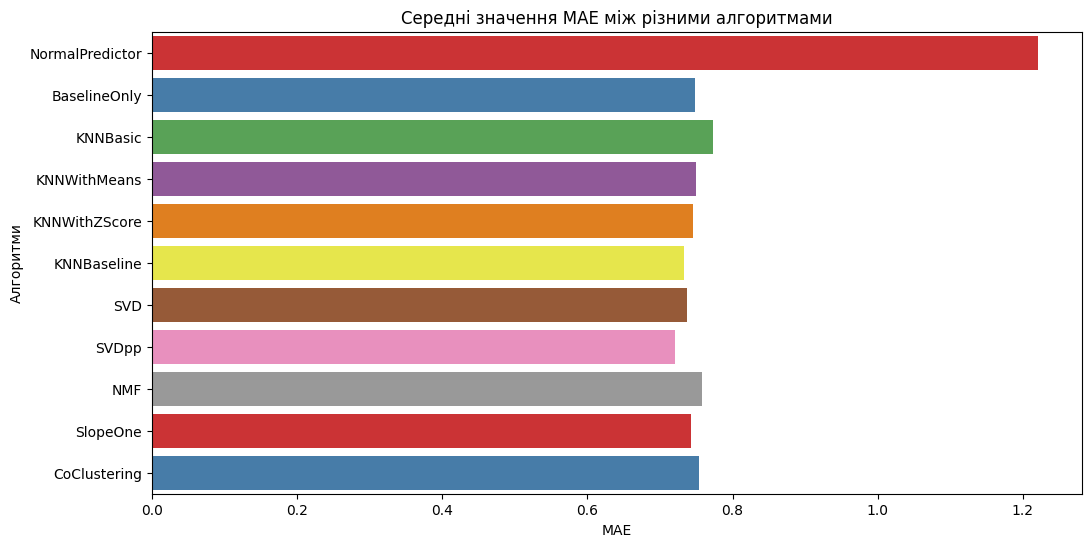

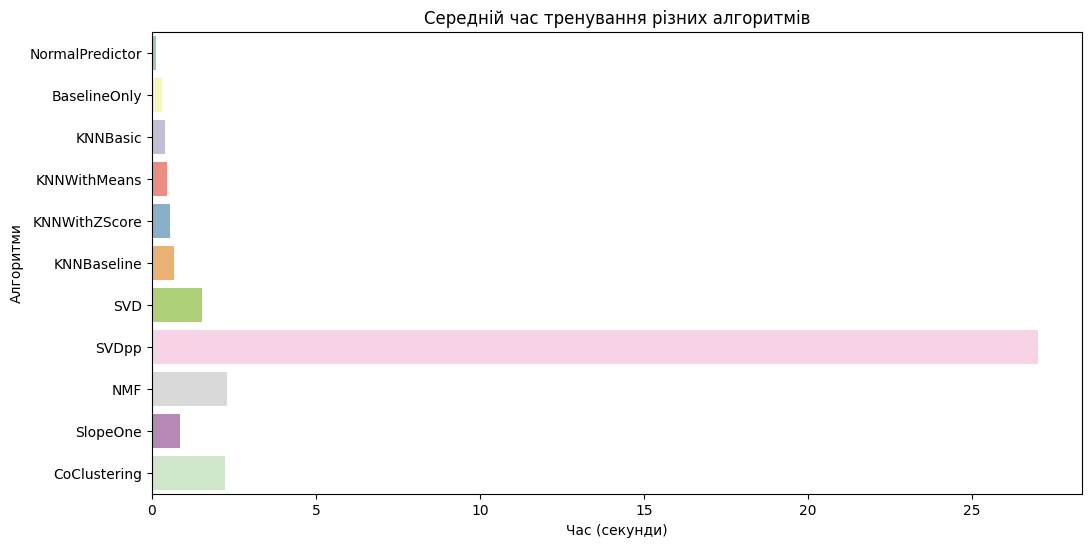

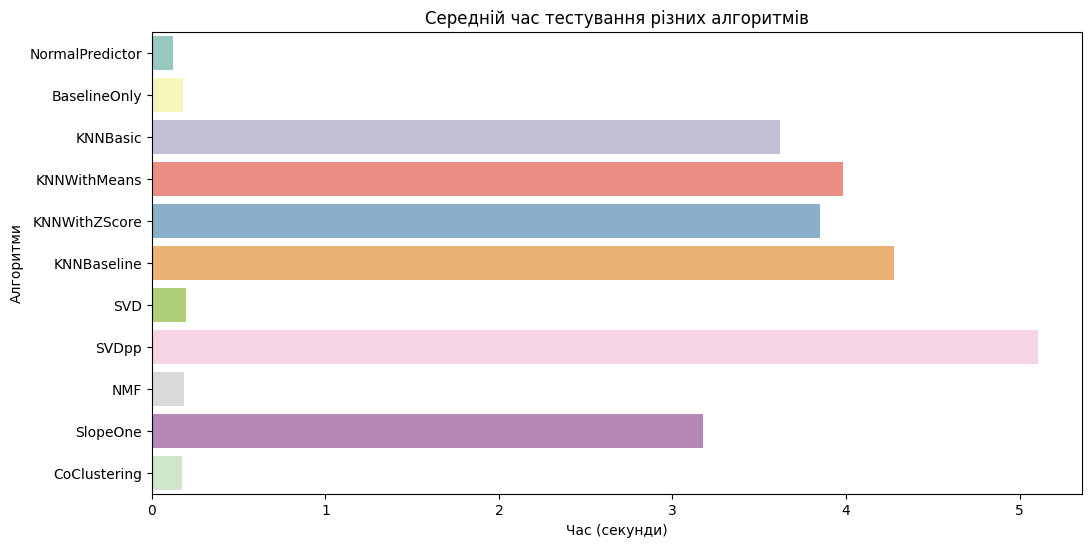

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Середні значення RMSE та MAE для кожного алгоритму
rmse_means = results_df['RMSE'].apply(lambda x: sum(x) / len(x))
mae_means = results_df['MAE'].apply(lambda x: sum(x) / len(x))

# Порівняння середніх значень RMSE для кожного алгоритму
plt.figure(figsize=(12, 6))
sns.barplot(x=rmse_means.values, y=rmse_means.index, hue=rmse_means.index, palette='Set2', legend=False)
plt.title('Середні значення RMSE між різними алгоритмами')
plt.xlabel('RMSE')
plt.ylabel('Алгоритми')
plt.show()

# Порівняння середніх значень MAE для кожного алгоритму
plt.figure(figsize=(12, 6))
sns.barplot(x=mae_means.values, y=mae_means.index, hue=mae_means.index, palette='Set1', legend=False)
plt.title('Середні значення MAE між різними алгоритмами')
plt.xlabel('MAE')
plt.ylabel('Алгоритми')
plt.show()

# Середній час тренування та тестування для кожного алгоритму
fit_time_means = results_df['Fit Time'].apply(lambda x: sum(x) / len(x))
test_time_means = results_df['Test Time'].apply(lambda x: sum(x) / len(x))

# Порівняння середнього часу тренування для кожного алгоритму
plt.figure(figsize=(12, 6))
sns.barplot(x=fit_time_means.values, y=fit_time_means.index, hue=fit_time_means.index, palette='Set3', legend=False)
plt.title('Середній час тренування різних алгоритмів')
plt.xlabel('Час (секунди)')
plt.ylabel('Алгоритми')
plt.show()

# Порівняння середнього часу тестування для кожного алгоритму
plt.figure(figsize=(12, 6))
sns.barplot(x=test_time_means.values, y=test_time_means.index, hue=test_time_means.index, palette='Set3', legend=False)
plt.title('Середній час тестування різних алгоритмів')
plt.xlabel('Час (секунди)')
plt.ylabel('Алгоритми')
plt.show()
